```
function cent = greedy_center_select(x, k)
% *********************************************************************** %
% Greedy Algorithm for Center Slection Problem.
% --------
% INPUT  :
% --------
%   x    : matrix(point_num, dimension_num), Double
%          point set
%   k    : matrix(1, 1), Integer
%          total number of centers
% --------
% OUTPUT :
% --------
%   cent : matrix(k, dimension_num), Double
% --------
% Example:
% --------
%     %%
%     rng(0);
%     set = [mvnrnd([2 -2], [2 1.5; 1.5, 2], 500); mvnrnd([-2 2], [2 1.5; 1.5, 2], 500)];
%     plot(set(:, 1), set(:, 2), '.'); hold on;
%     cent = greedy_center_select(set, 6);
%     for cent_ind = 1 : size(cent)
%         text(cent(cent_ind, 1), cent(cent_ind, 2), num2str(cent_ind), 'Color', 'r', 'FontSize', 25);
%         hold on;
%     end
%     hold off;
% 
%     %%
%     set = [(-10 : 10)' (-10 : 10)'];
%     plot(set(:, 1), set(:, 2), '.'); hold on;
%     cent = greedy_center_select(set, 5);
%     for cent_ind = 1 : size(cent)
%         text(cent(cent_ind, 1), cent(cent_ind, 2), num2str(cent_ind), 'Color', 'r', 'FontSize', 25);
%         hold on;
%     end
%     hold off;
% *********************************************************************** %
    cent = x(1, :);
    x(1, :) = [];
    for i = 2 : k
        dist = pdist2(x, cent);
        min_dist = min(dist, [], 2);
        [~, max_min_dist]= max(min_dist);
        cent = cat(1, cent, x(max_min_dist, :));
        x(max_min_dist, :) = [];
    end
end

```

In [2]:
from scipy.spatial import distance
import numpy as np
from numpy.random import multivariate_normal
import matplotlib as plt

In [18]:
def greedy_center_select(x,k):
    '''
    Input 
    x: matrix: (number of points, Dimensions)
    k: number of centers
    '''
    centers = list()
    centers.append(x[0])
    np.delete(x,0,0)
    for i in range(1,k):
        D = distance.cdist(x,np.matrix(centers), 'euclidean')
        min_dis = np.amin(D, axis=1)
        max_idx = np.argmax(min_dis)
        centers.append(x[max_idx])
        np.delete(x,max_idx,0)
    return np.matrix(centers)

In [39]:
x = multivariate_normal(np.array([2,-2]),[[2,1.5],[1.5,2]],500)
y = multivariate_normal(np.array([-2,2]),[[2,1.5],[1.5,2]],500)
xy = np.concatenate((x,y),axis=0)

In [36]:
x = np.matrix(np.arange(-10,11))
y = np.matrix(np.arange(-10,11))
# x.reshape(1,x.shape[0])
# y.reshape(1,y.shape[0])
xy = np.concatenate((x,y),axis=0)
xy = xy.transpose()

In [40]:
xy[:2]

array([[ 3.33869807, -0.15987426],
       [ 2.22547697, -2.66611604]])

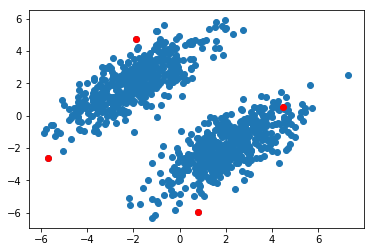

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(xy[:,0],xy[:,1])
result = greedy_center_select(xy,4)
plt.scatter(np.array(result[:,0]),np.array(result[:,1]),c='red')

In [9]:
X = np.matrix([[1,1],[2,2]])
C = np.matrix([[0,0],[0,-1]])
D = distance.cdist(X,C, 'euclidean')
g = np.amin(D, axis=1)
print(D,g)

[[ 1.41421356  2.23606798]
 [ 2.82842712  3.60555128]] [ 1.41421356  2.82842712]


```
function [class, cent] = K_Means(x, k, max_iter)
% *********************************************************************** %
% K-Means Clustering Algorithm [Lloyd' K-Means].
% --------
% INPUT  :
% --------
%   x    : matrix(point_num, dimension_num), Double
%          point set
%   k    : matrix(1, 1), Integer
%          total number of centroids
%   max_iter : matrix(1, 1), Integer
%          maximum number of iterations
% --------
% OUTPUT :
% --------
%   class: matrix(point_num, 1), Integer
%          range from 1 to k
%   cent : matrix(k, dimension_num), Double
% --------
% Example:
% --------
%     rng(1);
%     x = [mvnrnd([5 5], [1.5 0; 0 1.5], 500); ...
%          mvnrnd([5 -5], [1.5 0; 0 1.5], 500); ...
%          mvnrnd([-5 5], [1.5 0; 0 1.5], 500); ...
%          mvnrnd([-5 -5], [1.5 0; 0 1.5], 500)];
%     k = 4;
%     [class, cent] = K_Means(x, k, 1e3);
%     fig_colors = {'r', 'b', 'g', 'm'};
%     for k_ind = 1 : k
%         plot(x(class == k_ind, 1), x(class == k_ind, 2), '.', 'Color', fig_colors{1, k_ind}); hold on;
%         plot(cent(k_ind, 1), cent(k_ind, 2), 'kx', 'MarkerSize', 12, 'LineWidth', 5); 
%     end
%     hold off;
% --------
% Ref    :
% --------
%   * Lloyd S. Least squares quantization in PCM. 
%       IEEE transactions on information theory. 1982 Mar;28(2):129-37.
%   * http://lear.inrialpes.fr/~verbeek/software
% *********************************************************************** %
    [point_num, ~] = size(x);
    cent = x(randperm(point_num, k), :);
    for iter_ind = 1 : max_iter
        dist = pdist2(x, cent);
        [~, class] = min(dist, [], 2);
        for cent_ind = 1 : k
            cent(cent_ind, :) = mean(x(class == cent_ind, :), 1);
        end
    end
end

```

In [43]:
def K_Means(x, k, max_iter):
    '''
    % --------
    % INPUT  :
    % --------
    %   x    : matrix(point_num, dimension_num), Double
    %          point set
    %   k    : matrix(1, 1), Integer
    %          total number of centroids
    %   max_iter : matrix(1, 1), Integer
    %          maximum number of iterations
    % --------
    % OUTPUT :
    % --------
    %   class: matrix(point_num, 1), Integer
    %          range from 1 to k
    %   cent : matrix(k, dimension_num), Double
    % --------
    '''
    point_num = x.shape[0]
    r = np.arange(point_num)
    np.random.shuffle(r)
    centers = x[r[:k],:]
    class_ = None
    for i in range(max_iter):
        D = distance.cdist(x,np.matrix(centers), 'euclidean')
        class_ = np.argmin(D, axis=1)
        for j in range(k):
            centers[j,:] = np.mean(x[class_ ==j],axis=0)
    return (centers,class_)
    

In [38]:
class_ = np.array([0,1,0,1])
x = np.array([1,2,3,4])
x[class_ == 1]

array([2, 4])

In [41]:
x = np.matrix([[0,0],[1,2]])
x

matrix([[0, 0],
        [1, 2]])

In [42]:
np.mean(x,axis=0)

matrix([[ 0.5,  1. ]])